In [3]:
# Do relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2



In [4]:
# Read in and grayscale the image
# resmi oku ve grayscale'e çevir
image = cv2.imread('/home/jony/Documents/python_projects/'
                    'py3projects/learning_python/'
                    'udacity_self_driving_car/exit-ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)



In [5]:
# Define a kernel size and apply Gaussian smoothing
# kernel boyutunu belirle ve Gaussian yumuşatmasını uygula
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)



In [6]:
# Define our parameters for Canny and apply
# Canny için parametreleri belirle ve uygula
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)



In [7]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
# Hough dönüşümü için parametreleri belirle,
# Üzerine yazmak için asıl resmin boyutlarında 
# boş beyaz bir tuval oluştur. 
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1
line_image = np.copy(image)*0 #creating a blank to draw lines on



In [8]:
# Run Hough on edge detected image
# algılanan resmin üzerine Hough'u çalıştır
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)



In [9]:
# Iterate over the output "lines" and draw lines on the blank
# Çıktı doğrularını tek tek hesaplayıp boş tuvale yaz
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
        
        

In [10]:
# Create a "color" binary image to combine with line image
# 'renkli' ikili resim oluştur doğru resmiyle
color_edges = np.dstack((edges, edges, edges))



In [11]:
# Draw the lines on the edge image
# Ayrıt imgesi üzerine doğruları çiz
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
plt.imshow(combo)



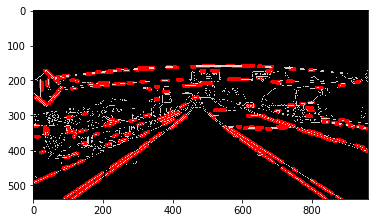

In [12]:
plt.show()